<a href="https://colab.research.google.com/github/Agnish1234/Stock-Data-Visualization./blob/main/Extracting_and_Visualizing_Stock_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📝 **Stock Market Analysis & Forecasting of Indian Blue-Chip Companies (2019–2024):** Analyze historical stock data of key Indian companies, visualize price trends, measure volatility and correlations, and forecast future prices using time-series modeling with Prophet.

1. Import Libraries & Define Company Tickers
We use `yfinance` to extract historical data for major Indian companies.

In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")

companies = {
    'RELIANCE': 'RELIANCE.NS',
    'INFY': 'INFY.NS',
    'HDFCBANK': 'HDFCBANK.NS',
    'TCS': 'TCS.NS',
    'ICICIBANK': 'ICICIBANK.NS',
    'HINDUNILVR': 'HINDUNILVR.NS',
    'SBIN': 'SBIN.NS',
    'BAJFINANCE': 'BAJFINANCE.NS',
    'WIPRO': 'WIPRO.NS'
}

start_date = '2019-01-01'
end_date = '2024-12-31'

2. Download Historical Stock Data
We fetch daily prices and build a dictionary of dataframes.

In [16]:
def fetch_data(ticker):
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        if data is None:
            print(f"Warning: Failed to download data for ticker {ticker}")
            return pd.DataFrame()
        return data
    except Exception as e:
        print(f"Error downloading data for {ticker}: {e}")
        return pd.DataFrame()

stock_data = {name: fetch_data(ticker) for name, ticker in companies.items()}

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


3. Markdown Cell: Visualize Individual Stock: Plot Reliance’s stock trend across the full range.

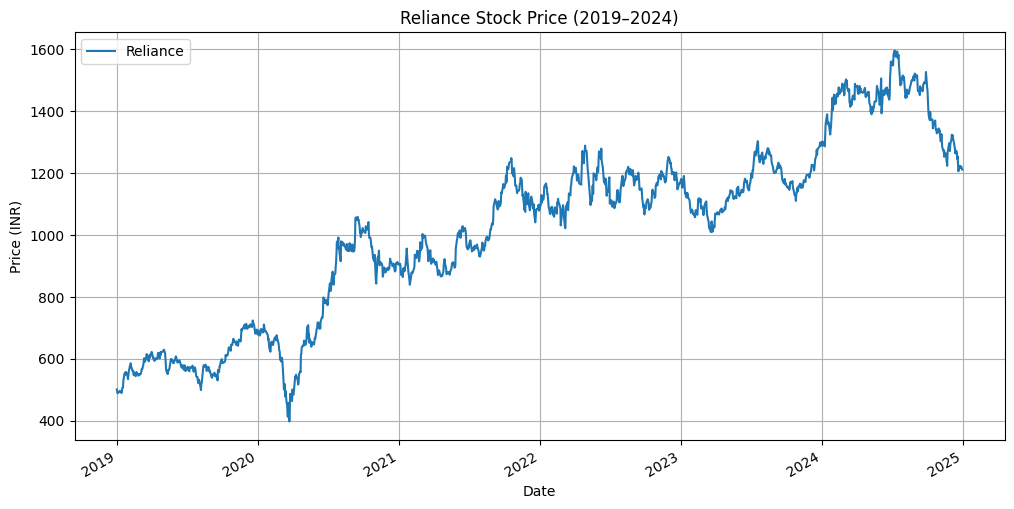

In [17]:
# Filter out empty Series and create close_data DataFrame
valid_stock_data = {name: data['Close'] for name, data in stock_data.items() if not data.empty and 'Close' in data.columns}

if valid_stock_data: # Check if the dictionary is not empty
    # Convert dictionary of Series to a list of Series and concatenate
    close_data = pd.concat(list(valid_stock_data.values()), axis=1)
    close_data.columns = valid_stock_data.keys() # Assign column names from dictionary keys

    plt.figure(figsize=(12, 6))
    if 'RELIANCE' in close_data.columns and not close_data['RELIANCE'].empty:
        close_data['RELIANCE'].plot(label='Reliance')
        plt.title('Reliance Stock Price (2019–2024)')
        plt.xlabel('Date')
        plt.ylabel('Price (INR)')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("RELIANCE data not available for plotting.")
else:
    print("No valid stock data available to create the close_data DataFrame.")

4. Reliance Line Plot.

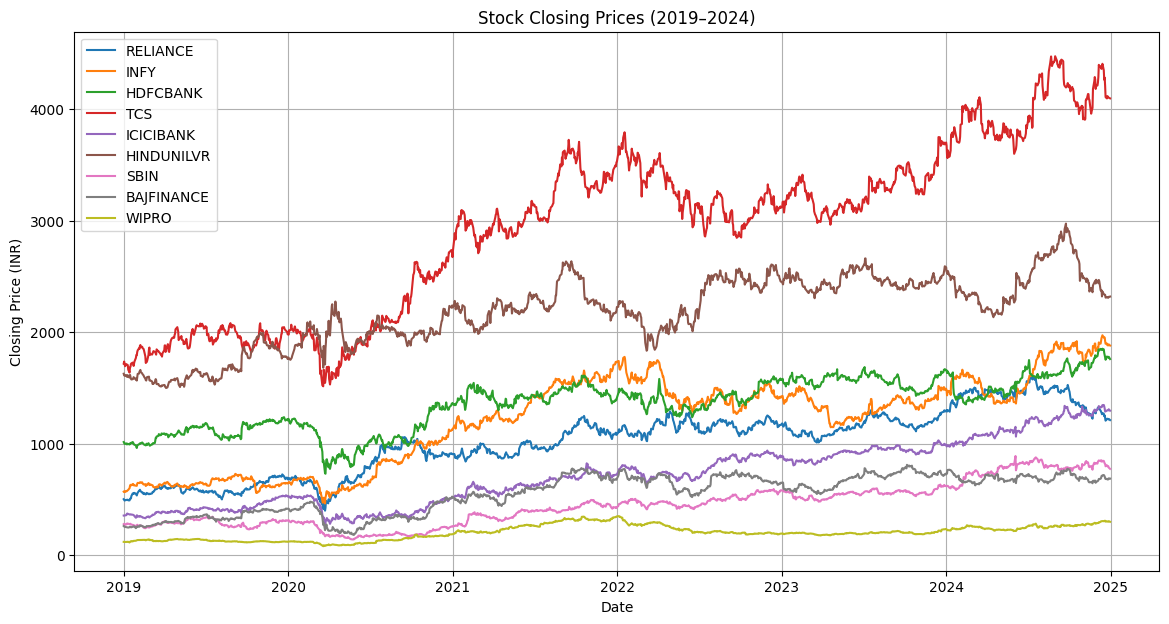

In [18]:
plt.figure(figsize=(14, 7))
for company in close_data.columns:
    plt.plot(close_data[company], label=company)
plt.title('Stock Closing Prices (2019–2024)')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.grid(True)
plt.show()


 5. Compare Closing Prices of All Companies:
We look at multiple companies together to uncover patterns and performance.

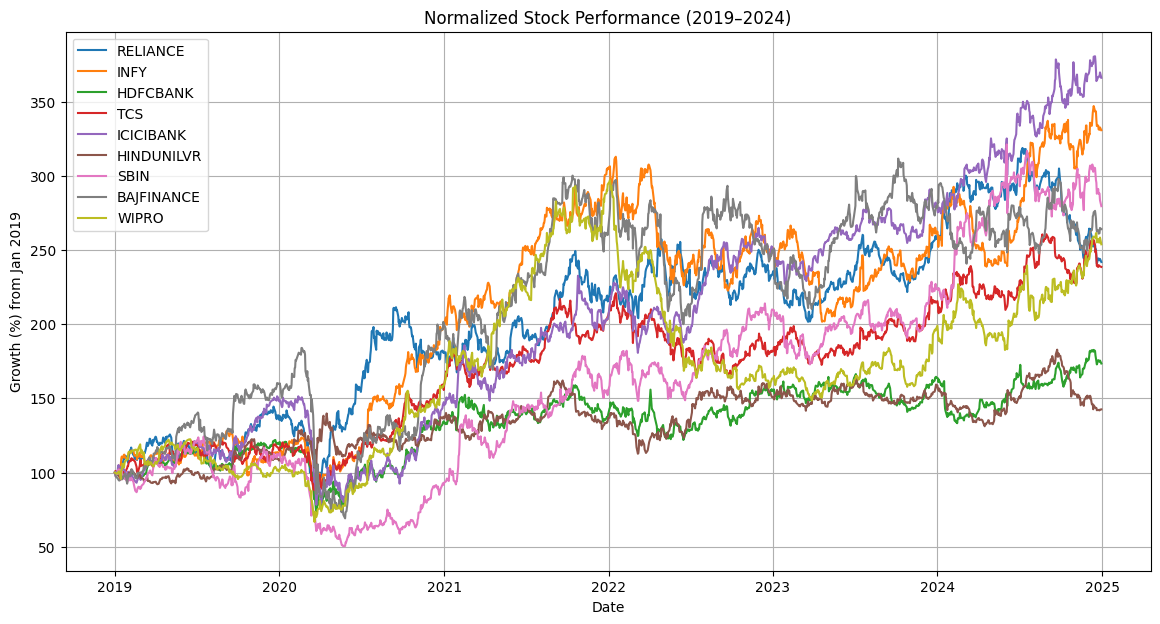

In [25]:
# Multi-line Plot.

normalized_data = close_data / close_data.iloc[0] * 100
plt.figure(figsize=(14, 7))
for company in normalized_data.columns:
    plt.plot(normalized_data[company], label=company)
plt.title('Normalized Stock Performance (2019–2024)')
plt.xlabel('Date')
plt.ylabel('Growth (%) from Jan 2019')
plt.legend()
plt.grid(True)
plt.show()


6. Moving Averages
Visualizing MA50 and MA200 for Reliance to understand price momentum.

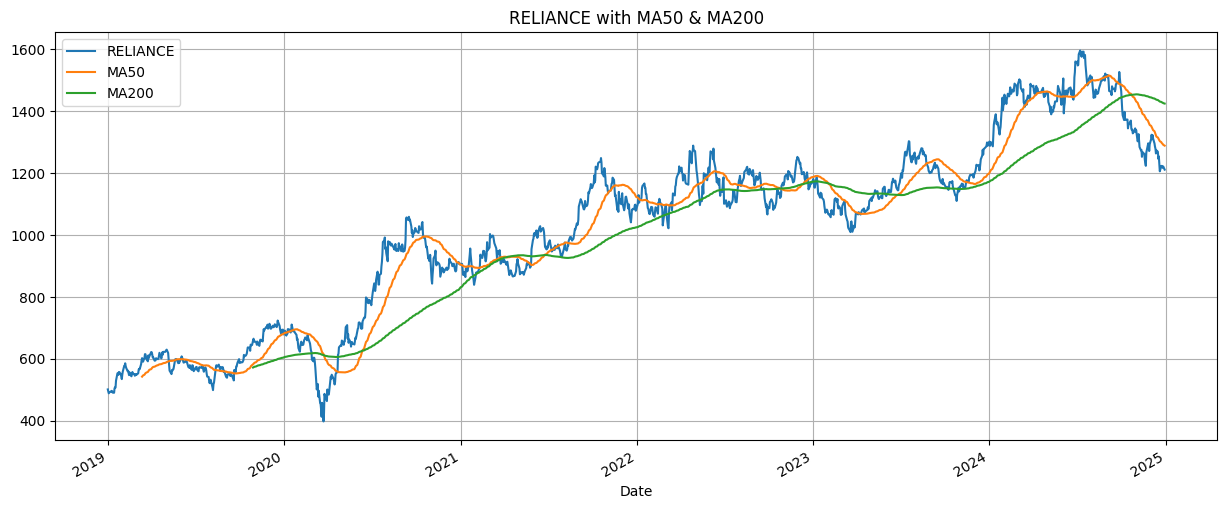

In [20]:
# Code Cell: MA Plot.

company = 'RELIANCE'
df_ma = close_data[[company]].copy()
df_ma['MA50'] = df_ma[company].rolling(window=50).mean()
df_ma['MA200'] = df_ma[company].rolling(window=200).mean()
df_ma.plot(figsize=(15,6), title=f"{company} with MA50 & MA200")
plt.grid(True)
plt.show()

7. Volatility Analysis
We use standard deviation of daily returns to rank volatility across stocks.

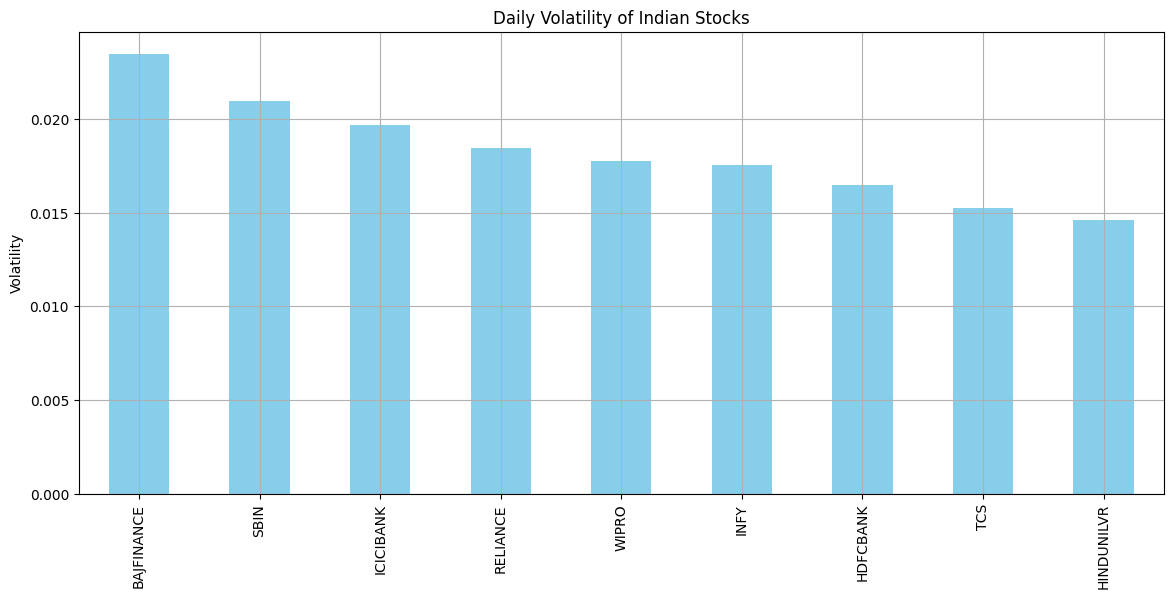

In [21]:
# Volatility Bar Chart.

daily_returns = close_data.pct_change().dropna()
plt.figure(figsize=(14, 6))
daily_returns.std().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Daily Volatility of Indian Stocks')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()


8. Correlation Heatmap
We assess how closely stock returns are interrelated.

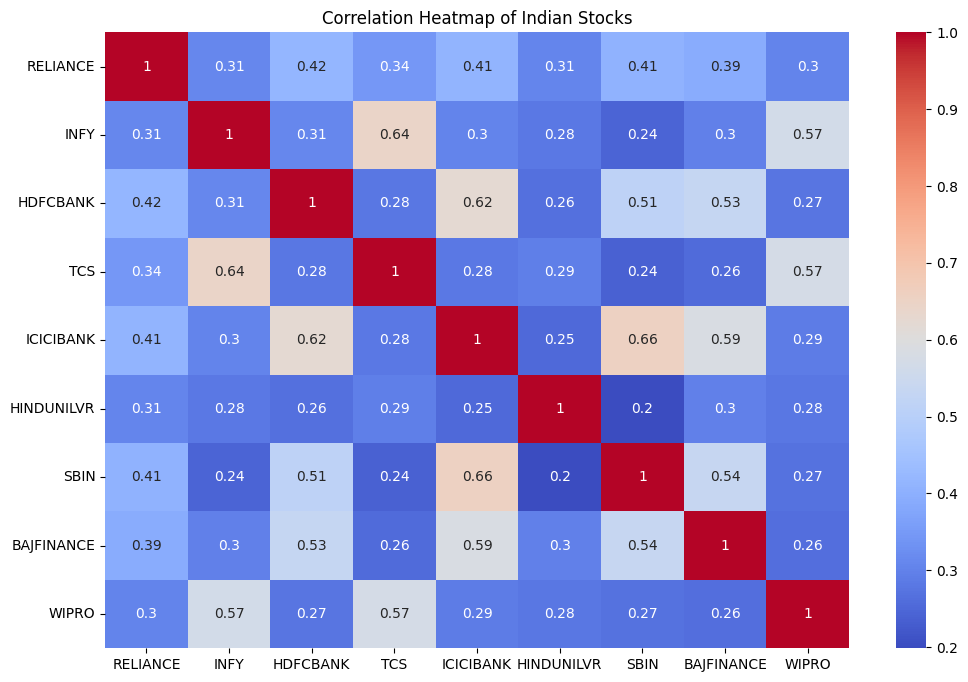

In [22]:
# Heatmap.

plt.figure(figsize=(12, 8))
sns.heatmap(daily_returns.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Indian Stocks")
plt.show()


9. Interactive Visualization
Explore Reliance's data dynamically with Plotly.

In [23]:
# Plotly Chart.

def interactive_plot(stock):
    data = fetch_data(stock)
    if not data.empty:
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=data.index, y=data['Close'], name='Price'))
        fig.update_layout(title=f'{stock} Stock Price', xaxis_title='Date', yaxis_title='Price (INR)')
        fig.show()

interactive_plot('RELIANCE.NS')


[*********************100%***********************]  1 of 1 completed


10. Forecasting with Prophet
We forecast Reliance stock prices using Facebook Prophet over a 6-month horizon.

[*********************100%***********************]  1 of 1 completed
DEBUG:cmdstanpy:input tempfile: /tmp/tmplm4npy9e/g36zijeq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplm4npy9e/ujw3kxh5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28553', 'data', 'file=/tmp/tmplm4npy9e/g36zijeq.json', 'init=/tmp/tmplm4npy9e/ujw3kxh5.json', 'output', 'file=/tmp/tmplm4npy9e/prophet_model6zz8atpy/prophet_model-20250726171307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:13:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:13:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


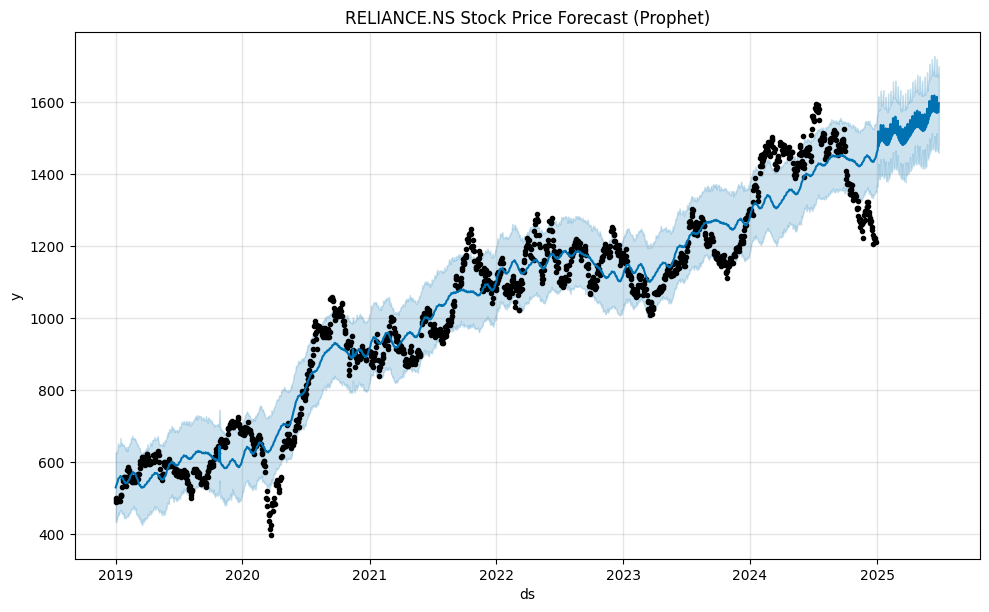

In [24]:
# Prophet Forecast.

reliance = fetch_data('RELIANCE.NS')[['Close']].reset_index()
reliance.columns = ['ds', 'y']
model = Prophet(daily_seasonality=True)
model.fit(reliance)
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)
model.plot(forecast)
plt.title("RELIANCE.NS Stock Price Forecast (Prophet)")
plt.show()


## 🔍 Insights & Takeaways

- Reliance and Bajaj Finance showed consistent growth from 2019 to 2024.
- Banking sector stocks exhibited strong volatility but also high correlation.
- Prophet forecast predicts steady upward movement for Reliance over the next 6 months.

---

## ⚠️ Limitations

- Forecast assumes past patterns continue—economic shocks aren’t considered.
- External indicators like sentiment or policy changes are outside the current model scope.

---

## 🧭 Real-World Applications

- One can use this framework for investor portfolio evaluation.
- Can be extended into algorithmic trading or dashboard design.
